<a href="https://colab.research.google.com/github/satvik-venkatesh/word-eq/blob/main/Word-EQ-GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import shutil

In [2]:
import pandas as pd

In [3]:
"""
Download the Glove from drive.
"""
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1A-KM4ugWdi3rJ8lVKYZXdrAcfZQlkGj-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1A-KM4ugWdi3rJ8lVKYZXdrAcfZQlkGj-" -O glove.6B.zip && rm -rf /tmp/cookies.txt


--2022-01-22 18:55:36--  https://docs.google.com/uc?export=download&confirm=w83L&id=1A-KM4ugWdi3rJ8lVKYZXdrAcfZQlkGj-
Resolving docs.google.com (docs.google.com)... 142.251.33.206, 2607:f8b0:4004:82f::200e
Connecting to docs.google.com (docs.google.com)|142.251.33.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-ak-docs.googleusercontent.com/docs/securesc/ro55ahn4nidv7tdubpe8oq7a9pqhdmo7/qpqig29kei6eld8hjovgc0qqmrp1ln2o/1642877700000/04739181468756608208/03355724858555306846Z/1A-KM4ugWdi3rJ8lVKYZXdrAcfZQlkGj-?e=download [following]
--2022-01-22 18:55:36--  https://doc-10-ak-docs.googleusercontent.com/docs/securesc/ro55ahn4nidv7tdubpe8oq7a9pqhdmo7/qpqig29kei6eld8hjovgc0qqmrp1ln2o/1642877700000/04739181468756608208/03355724858555306846Z/1A-KM4ugWdi3rJ8lVKYZXdrAcfZQlkGj-?e=download
Resolving doc-10-ak-docs.googleusercontent.com (doc-10-ak-docs.googleusercontent.com)... 172.217.2.97, 2607:f8b0:4004:80a::2001
Connecting to doc-10-

In [4]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

In [5]:
#!wget https://nlp.stanford.edu/data/glove.840B.300d.zip
"""
Download the Glove 840B from drive.
"""
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18SddG0mv6bfRItzTUzRrlsuqLmtzS55r' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18SddG0mv6bfRItzTUzRrlsuqLmtzS55r" -O glove.840B.300d.zip && rm -rf /tmp/cookies.txt

--2022-01-22 18:56:17--  https://docs.google.com/uc?export=download&confirm=FW0c&id=18SddG0mv6bfRItzTUzRrlsuqLmtzS55r
Resolving docs.google.com (docs.google.com)... 142.251.33.206, 2607:f8b0:4004:82f::200e
Connecting to docs.google.com (docs.google.com)|142.251.33.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-34-docs.googleusercontent.com/docs/securesc/eimctd2b46qij7jdd3825fv67913ok8s/tisv06phfuei711dsdilun0mtri1cp6j/1642877775000/04739181468756608208/13388761798862722483Z/18SddG0mv6bfRItzTUzRrlsuqLmtzS55r?e=download [following]
--2022-01-22 18:56:17--  https://doc-00-34-docs.googleusercontent.com/docs/securesc/eimctd2b46qij7jdd3825fv67913ok8s/tisv06phfuei711dsdilun0mtri1cp6j/1642877775000/04739181468756608208/13388761798862722483Z/18SddG0mv6bfRItzTUzRrlsuqLmtzS55r?e=download
Resolving doc-00-34-docs.googleusercontent.com (doc-00-34-docs.googleusercontent.com)... 172.217.2.97, 2607:f8b0:4004:80a::2001
Connecting to doc-00-

In [6]:
!unzip -q glove.840B.300d.zip

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# !cp "/content/drive/MyDrive/audio-and-word-embeddings/eq_contributions.csv" .

In [9]:
import os
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
import csv
from collections import Counter
import random
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
import matplotlib.pyplot as plt

In [10]:
def read_annotation(filename):
    events = []
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            events.append(row)
    return events

In [11]:
"""
Download the SocialFX dataset for EQ settings and descriptors. 
"""
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BrI0XPhzwDt7-_PZwtpsavtoPvRvjyKF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1BrI0XPhzwDt7-_PZwtpsavtoPvRvjyKF" -O eq_contributions.csv && rm -rf /tmp/cookies.txt

--2022-01-22 18:58:11--  https://docs.google.com/uc?export=download&confirm=&id=1BrI0XPhzwDt7-_PZwtpsavtoPvRvjyKF
Resolving docs.google.com (docs.google.com)... 142.250.81.206, 2607:f8b0:4004:82f::200e
Connecting to docs.google.com (docs.google.com)|142.250.81.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-1o-docs.googleusercontent.com/docs/securesc/3tghg6e8nukg3gg4eov2f9v6ftp9ts5e/o6etb45bcm4sfdkv1rbsbpi6qvj75utj/1642877850000/04739181468756608208/05381299362209524802Z/1BrI0XPhzwDt7-_PZwtpsavtoPvRvjyKF?e=download [following]
--2022-01-22 18:58:12--  https://doc-14-1o-docs.googleusercontent.com/docs/securesc/3tghg6e8nukg3gg4eov2f9v6ftp9ts5e/o6etb45bcm4sfdkv1rbsbpi6qvj75utj/1642877850000/04739181468756608208/05381299362209524802Z/1BrI0XPhzwDt7-_PZwtpsavtoPvRvjyKF?e=download
Resolving doc-14-1o-docs.googleusercontent.com (doc-14-1o-docs.googleusercontent.com)... 172.217.2.97, 2607:f8b0:4004:80a::2001
Connecting to doc-14-1o-d

In [12]:
events = read_annotation("/content/eq_contributions.csv")
len(events)

1596

In [13]:
words_list = [e[0].lower() for e in events[1:] if e[1] == "English"]

In [14]:
len(words_list)

918

In [15]:
hq_words = ["bright","brittle","clear","crisp","harsh","hollow","sharp","shrill","tinny","woody","big","boom","boxy","dark","dull","fat","full","muddy","muffled","punch","smooth","sweet","warm","flat",
            "crunchy","deep","soothing","clean","airy","cold","metallic","booming"]

In [16]:
len(hq_words)

32

In [17]:
words_list[0:10]

['hot',
 'wet',
 'slow',
 'saucy',
 'heavy',
 'shrill',
 'warm',
 'chill',
 'sharp',
 'corn']

In [18]:
high_rated_words = list(set([e[0].lower() for e in events[1:] if e[1] == "English" and float(e[3]) > 0.7 and e[0].lower() not in hq_words]))
high_rated_words.sort()

In [19]:
high_rated_words

['aggressive',
 'baseball',
 'beautiful',
 'biting',
 'bold',
 'brash',
 'brass',
 'brassy',
 'breezy',
 'calm',
 'caring',
 'cheerful',
 'clarity',
 'cooing',
 'cool',
 'cute',
 'disgusting',
 'down',
 'edge',
 'edgy',
 'enchanting',
 'energetic',
 'energizing',
 'excited',
 'exciting',
 'fancy',
 'fluffy',
 'forceful',
 'frigid',
 'funky',
 'genius',
 'gentle',
 'good',
 'gruff',
 'happy',
 'hard',
 'heart-warming',
 'heat',
 'heavy',
 'hot',
 'huge',
 'icy',
 'jagged',
 'large',
 'light',
 'loud',
 'love',
 'low',
 'mellow',
 'mournful',
 'noisy',
 'passionate',
 'peace',
 'peaceful',
 'pleasing',
 'pleasurable',
 'plodding',
 'poor',
 'punchy',
 'quiet',
 'radiant',
 'relaxing',
 'reserved',
 'rich',
 'romantic',
 'rousing',
 'rumble',
 'serene',
 'sloppy',
 'slow',
 'soft',
 'solemn',
 'splash',
 'squeaking',
 'strong',
 'taco',
 'techno',
 'tense',
 'throbbing',
 'thumpy',
 'thunderous',
 'twangy',
 'velvety',
 'whispered',
 'whispering',
 'wistful']

In [20]:
len(high_rated_words)

86

In [21]:
# 5, 19, 71
# Using seed 137 for shuffling into folds
random.seed(137)
random.shuffle(hq_words)
random.shuffle(high_rated_words)
#test_word_set = hq_words[0:10] + high_rated_words[0:30]

In [22]:
test_word_set_1 = hq_words[0:9] + high_rated_words[0:22]
test_word_set_2 = hq_words[9:18] + high_rated_words[22:44]
test_word_set_3 = hq_words[18:27] + high_rated_words[44:66]

In [23]:
test_word_set_4 = hq_words[27:] + hq_words[0:4] + high_rated_words[66:] + high_rated_words[0:2]

In [24]:
test_word_set_4

['sharp',
 'big',
 'dark',
 'hollow',
 'harsh',
 'smooth',
 'muffled',
 'crisp',
 'punch',
 'mournful',
 'clarity',
 'genius',
 'bold',
 'twangy',
 'soft',
 'splash',
 'slow',
 'wistful',
 'brash',
 'fancy',
 'cute',
 'rousing',
 'loud',
 'breezy',
 'large',
 'passionate',
 'baseball',
 'huge',
 'icy',
 'brassy',
 'caring']

In [25]:
cc = dict(Counter(words_list))

In [26]:
words_set = list(cc.keys())
words_set.sort()

In [27]:
len(words_set)

388

In [28]:
cc

{'aggravating': 2,
 'aggressive': 4,
 'agitated': 1,
 'aidan': 1,
 'airy': 3,
 'alluring': 1,
 'anger': 1,
 'angry': 2,
 'annoying': 1,
 'anticipation': 1,
 'apple': 1,
 'archaic': 1,
 'awesome': 2,
 'awkward': 1,
 'bag': 1,
 'balanced': 1,
 'bang': 1,
 'baseball': 1,
 'bassy': 1,
 'bear': 1,
 'beautiful': 10,
 'big': 1,
 'biting': 1,
 'blaring': 1,
 'blast': 1,
 'boisterous': 1,
 'bold': 2,
 'bonito': 1,
 'boom': 1,
 'booming': 1,
 'bored': 1,
 'bouncy': 1,
 'boxy': 1,
 'brash': 1,
 'brass': 1,
 'brassy': 2,
 'brave': 1,
 'breezy': 1,
 'bright': 19,
 'brillante': 1,
 'brittle': 1,
 'buzz': 2,
 'calm': 13,
 'car': 1,
 'carefree': 1,
 'caring': 1,
 'cat': 2,
 'caustic': 1,
 'cerebral': 1,
 'charming': 1,
 'cheerful': 3,
 'cheery': 1,
 'children': 1,
 'chill': 1,
 'chilly': 1,
 'choppy': 1,
 'chunky': 2,
 'clarity': 1,
 'clash': 1,
 'classic': 2,
 'classy': 1,
 'clean': 4,
 'clear': 12,
 'coarse': 1,
 'cold': 34,
 'computer': 1,
 'confident': 1,
 'congested': 1,
 'cooing': 1,
 'cool': 14

# Folds are set below

In [29]:
# Set test_word_set to test_word_set_1, test_word_set_2, test_word_set_3, test_word_set_4 for different folds
test_word_set = test_word_set_1

In [30]:
train_word_set = [w for w in words_set if w not in test_word_set]

In [31]:
train_events = [e for e in events[1:] if e[1] == "English" and e[0].lower() in train_word_set]
#val_events = [e for e in events[1:] if e[1] == "English" and e[0] in val_word_set]
test_events = [e for e in events[1:] if e[1] == "English" and e[0].lower() in test_word_set and float(e[3]) > 0.7]

In [32]:
words_set = list(cc.keys())
words_set.sort()

In [33]:
train_samples = [e[0].lower() for e in train_events]
train_labels = [e[4:] for e in train_events]

# val_samples = [e[0] for e in val_events]
# val_labels = [e[4:] for e in val_events]

test_samples = [e[0].lower() for e in test_events]
test_labels = [e[4:] for e in test_events]

In [34]:
print(len(train_events))
# print(len(val_events))
print(len(test_events))

792
38


In [36]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/glove.840B.300d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  if __name__ == '__main__':


Found 2195884 word vectors.


In [37]:
vec2 = TextVectorization(output_sequence_length=1)
eq_ds = tf.data.Dataset.from_tensor_slices(words_set).batch(128)
vec2.adapt(eq_ds)

In [38]:
voc2 = vec2.get_vocabulary()
word_index_2 = dict(zip(voc2, range(len(voc2))))

In [39]:
len(voc2)

390

In [40]:
word_index_2

{'': 0,
 '[UNK]': 1,
 'aggravating': 389,
 'aggressive': 388,
 'agitated': 387,
 'aidan': 386,
 'airy': 385,
 'alluring': 384,
 'anger': 383,
 'angry': 382,
 'annoying': 381,
 'anticipation': 380,
 'apple': 379,
 'archaic': 378,
 'awesome': 377,
 'awkward': 376,
 'bag': 375,
 'balanced': 374,
 'bang': 373,
 'baseball': 372,
 'bassy': 371,
 'bear': 370,
 'beautiful': 369,
 'big': 368,
 'biting': 367,
 'blaring': 366,
 'blast': 365,
 'boisterous': 364,
 'bold': 363,
 'bonito': 362,
 'boom': 361,
 'booming': 360,
 'bored': 359,
 'bouncy': 358,
 'boxy': 357,
 'brash': 356,
 'brass': 355,
 'brassy': 354,
 'brave': 353,
 'breezy': 352,
 'bright': 351,
 'brillante': 350,
 'brittle': 349,
 'buzz': 348,
 'calm': 347,
 'car': 346,
 'carefree': 345,
 'caring': 344,
 'cat': 343,
 'caustic': 342,
 'cerebral': 341,
 'charming': 340,
 'cheerful': 339,
 'cheery': 338,
 'children': 337,
 'chill': 336,
 'chilly': 335,
 'choppy': 334,
 'chunky': 333,
 'clarity': 332,
 'clash': 331,
 'classic': 330,
 'cla

In [41]:
num_tokens = len(voc2) + 2
embedding_dim = 300
hits = 0
misses = 0

# Prepare embedding matrix for GloVe
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index_2.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        print(word)
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


[UNK]
spinetingling
Converted 387 words (3 misses)


In [42]:
# x_train = vec2(np.array([[s] for s in train_samples])).numpy()
# x_val = vec2(np.array([[s] for s in val_samples])).numpy()

# y_train = np.array(train_labels, dtype='float')
# y_val = np.array(val_labels, dtype='float')

# Data is normalised below

In [43]:
x_train = vec2(np.array([[s] for s in train_samples])).numpy()
#x_val = vec2(np.array([[s] for s in val_samples])).numpy()
x_test = vec2(np.array([[s] for s in test_samples])).numpy()

y_train = np.array(train_labels, dtype='float')[:, :]
#y_val = np.array(val_labels, dtype='float')[:, :]
y_test = np.array(test_labels, dtype='float')[:, :]

In [44]:
y_train.shape

(792, 40)

In [45]:
mmin = np.ones((40,)) * -4
mmin

array([-4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4.,
       -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4.,
       -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4.,
       -4.])

In [46]:
mmax = np.ones((40,)) * 4
mmax

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4.])

In [47]:
# y_combined = np.concatenate((y_train, y_val, y_test), axis = 0)
# mmax = y_combined.max(axis=0)
# mmin = y_combined.min(axis=0)

In [48]:
# mmax = np.ones()

In [49]:
y_train = (y_train - mmin) / (mmax - mmin)
#y_val = (y_val - mmin) / (mmax - mmin)
y_test = (y_test - mmin) / (mmax - mmin)

In [50]:
print(np.max(y_train))
#print(np.max(y_val))
print(np.max(y_test))

0.9324086192841996
0.8014170704018198


In [63]:
num_tokens = 392
embedding_dim = 300

In [59]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

In [64]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [65]:
num_tokens, embedding_dim

(392, 300)

In [68]:
"""
Neural network architecture
"""

int_sequences_input = keras.Input(shape=(1,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = embedded_sequences
# x = layers.GlobalMaxPooling1D()(x)
x = layers.Lambda(lambda xx: tf.squeeze(xx, axis=-2))(x)
x = layers.Dense(300, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(80, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(60, activation="relu")(x)
x = layers.Dropout(0.05)(x)
# x = layers.Dense(40, activation="relu")(x)
# x = layers.Dropout(0.05)(x)
preds = layers.Dense(40, activation="sigmoid")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.SGD(learning_rate=lr_schedule), 
    metrics=[tf.keras.losses.MeanAbsolutePercentageError(
    reduction="auto", name="mean_absolute_percentage_error")]
)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 embedding_2 (Embedding)     (None, 1, 300)            117600    
                                                                 
 lambda_2 (Lambda)           (None, 300)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               90300     
                                                                 
 dropout_10 (Dropout)        (None, 300)               0         
                                                                 
 dense_13 (Dense)            (None, 200)               60200     
                                                                 
 dropout_11 (Dropout)        (None, 200)               0   

In [69]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20000, validation_data=(x_test, y_test), verbose=2, callbacks=callback)

Epoch 1/20000
25/25 - 1s - loss: 0.1068 - mean_absolute_percentage_error: 23.6950 - val_loss: 0.1080 - val_mean_absolute_percentage_error: 24.1544 - 1s/epoch - 46ms/step
Epoch 2/20000
25/25 - 0s - loss: 0.1059 - mean_absolute_percentage_error: 23.5022 - val_loss: 0.1077 - val_mean_absolute_percentage_error: 24.0715 - 101ms/epoch - 4ms/step
Epoch 3/20000
25/25 - 0s - loss: 0.1057 - mean_absolute_percentage_error: 23.4467 - val_loss: 0.1075 - val_mean_absolute_percentage_error: 24.0359 - 115ms/epoch - 5ms/step
Epoch 4/20000
25/25 - 0s - loss: 0.1053 - mean_absolute_percentage_error: 23.3761 - val_loss: 0.1074 - val_mean_absolute_percentage_error: 24.0124 - 109ms/epoch - 4ms/step
Epoch 5/20000
25/25 - 0s - loss: 0.1051 - mean_absolute_percentage_error: 23.3231 - val_loss: 0.1073 - val_mean_absolute_percentage_error: 23.9899 - 109ms/epoch - 4ms/step
Epoch 6/20000
25/25 - 0s - loss: 0.1048 - mean_absolute_percentage_error: 23.2566 - val_loss: 0.1073 - val_mean_absolute_percentage_error: 23.

In [70]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0948 - mean_absolute_percentage_error: 21.1176


[0.09477633237838745, 21.11761474609375]

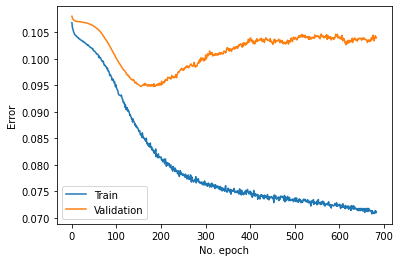

In [71]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [72]:
model.save_weights('audio_embedding.h5')

# Testing

In [74]:
!pip install git+https://github.com/detly/gammatone.git

  Cloning https://github.com/detly/gammatone.git to /tmp/pip-req-build-i5kz9v27
  Running command git clone -q https://github.com/detly/gammatone.git /tmp/pip-req-build-i5kz9v27
     |████████████████████████████████| 154 kB 15.0 MB/s 
  Created wheel for Gammatone: filename=Gammatone-1.0-py3-none-any.whl size=21795 sha256=7d5a550bc25bde6e4673bd6075556e79d09b328d5b53f87f33f70316f6d3833e
  Stored in directory: /tmp/pip-ephem-wheel-cache-5mowbzl_/wheels/07/b9/a7/356576d1172ea99bf71c5f5502bb20e951769a34b4e86fe6cc
Successfully built Gammatone


In [76]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP" -O signals.zip && rm -rf /tmp/cookies.txt
!unzip signals.zip

--2022-01-22 19:12:14--  https://docs.google.com/uc?export=download&confirm=Yjoj&id=1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP
Resolving docs.google.com (docs.google.com)... 142.250.81.206, 2607:f8b0:4004:82f::200e
Connecting to docs.google.com (docs.google.com)|142.250.81.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-34-docs.googleusercontent.com/docs/securesc/4398knqjpgk6psmak9cp9s91mfnfb9o9/ed5raer0cl5iusun0ln7834eohkd98aq/1642878675000/04739181468756608208/03009969527440335729Z/1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP?e=download [following]
--2022-01-22 19:12:14--  https://doc-0k-34-docs.googleusercontent.com/docs/securesc/4398knqjpgk6psmak9cp9s91mfnfb9o9/ed5raer0cl5iusun0ln7834eohkd98aq/1642878675000/04739181468756608208/03009969527440335729Z/1FV5KDNVsBpb1fRp2kmyWxDhL1EfvvqAP?e=download
Resolving doc-0k-34-docs.googleusercontent.com (doc-0k-34-docs.googleusercontent.com)... 172.217.2.97, 2607:f8b0:4004:80a::2001
Connecting to doc-0k-

In [77]:
from gammatone import filters 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display

In [78]:
# Load and listen to original audio sample

x, fs = sf.read('signals/e_gtr_short.wav')
print(f"Loaded {x.shape[0]} samples at fs={fs}")
IPython.display.Audio(x,rate=fs)

Loaded 458317 samples at fs=44100


In [82]:
# Create filters
# - I have checked the center frequencies and implementation of the filters, and they all match up the same from the paper.
c_freqs = filters.centre_freqs(fs, 40, 20)
fcoefs = filters.make_erb_filters(fs, c_freqs, width=1.0)

In [84]:
# Apply filterbank to audio signal and apply a given gain waiting value  to each band.
# Select a term (from the list above) and listen.
filterbank_x = filters.erb_filterbank(x, fcoefs)

# Testing with audio files

In [86]:
test_word_set[2]

'crisp'

In [85]:
test_words = test_word_set[2]
test_words_vec = vec2(np.array([[s] for s in test_words])).numpy()
p = model.predict(test_words_vec)
# y_test = (y_test - mmin) / (mmax - mmin)
p = p * (mmax - mmin) + mmin

# Apply filterbank to audio signal and apply a given gain waiting value  to each band.
# Select a term (from the list above) and listen.
filterbank_x = filters.erb_filterbank(x, fcoefs)
out = np.sum(filterbank_x.T * np.flip(p[0, :]),axis=1)
IPython.display.Audio(out,rate=fs)